# Chapter6 : Deep learning for text and sequences

## 6.4 Sequence processing with convnets

1D convnets can be competitive with RNNs on certain sequence-processing problems, usually at a considerably cheaper computational cost. In addition, it has long been known that small 1D convnets can offer a fast alternative to RNNs for simple tasks such as text classification and timeseries forecasting.

### 6.4.1 Understanding 1D convolution for sequence data

The convolution layers introduced previously were 2D convolutions, extracting 2D patches from image tensors and applying an identical transformation to every patch. In the same way, you can use 1D convolutions, extracting local 1D patches from sequences.

Such 1D convolution layers can recognize local patterns in a sequence. Because the same input transformation is performed on every patch, a pattern learned at a certain position in a sentence can later be recognized at a different position, making 1D convnets translation invariant. A character-level 1D convnet is thus able to learn about word morophology.

### 6.4.2 1D pooling for sequence data

The 2D pooling operation has a 1D equivalent: extracting 1D patches (subsequences) from an input and outputting hte maximum value (max pooling) or average value (average pooling). Just as with 2D convnets, this is used for reducing the length of 1D inputs (subsampling).

### 6.4.3 Implementing a 1D convnet

#### Preparing the IMDB data

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [3]:
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


#### Training and evaluating a simple 1D convnet on the IMDB data

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [6]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable para

In [7]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 54s - loss: 0.8337 - acc: 0.5089 - val_loss: 0.6874 - val_acc: 0.5664
Epoch 2/10
 - 58s - loss: 0.6699 - acc: 0.6393 - val_loss: 0.6641 - val_acc: 0.6586
Epoch 3/10
 - 59s - loss: 0.6235 - acc: 0.7530 - val_loss: 0.6079 - val_acc: 0.7442
Epoch 4/10
 - 61s - loss: 0.5258 - acc: 0.8080 - val_loss: 0.4844 - val_acc: 0.8052
Epoch 5/10
 - 63s - loss: 0.4115 - acc: 0.8483 - val_loss: 0.4299 - val_acc: 0.8286
Epoch 6/10
 - 60s - loss: 0.3491 - acc: 0.8696 - val_loss: 0.4099 - val_acc: 0.8404
Epoch 7/10
 - 67s - loss: 0.3114 - acc: 0.8716 - val_loss: 0.4303 - val_acc: 0.8268
Epoch 8/10
 - 58s - loss: 0.2812 - acc: 0.8627 - val_loss: 0.4274 - val_acc: 0.8064
Epoch 9/10
 - 63s - loss: 0.2537 - acc: 0.8429 - val_loss: 0.4379 - val_acc: 0.7976
Epoch 10/10
 - 67s - loss: 0.2306 - acc: 0.8185 - val_loss: 0.4981 - 

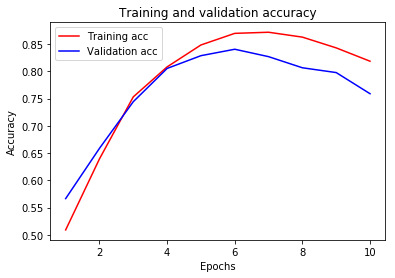

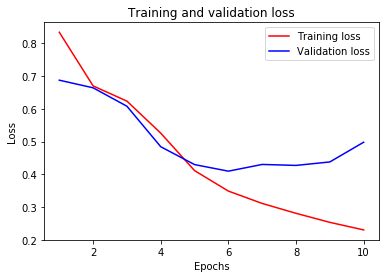

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

> Validation accuracy is somewhat less than that of the LSTM, but runtime is faster on both CPU and GPU.

This is a convincing demonstration that a 1D convnet can offer a fast, cheap alternative to a recurrent network on a word-level sentiment-classification task.

#### 6.4.4 Combining CNNs and RNNs to process long sequences

Because 1D convnets process input patches independently, they aren't sensitive to the order of the timesteps, unlike RNNs.

#### Training and evaluating a simple 1D convnet  on the Jena data

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [13]:
import os

data_dir = 'C:/Users/jeong/Documents/GITHUB/DeepLearningWithPython/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [14]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [15]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [16]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [17]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [19]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              verbose=2)

Epoch 1/20
 - 34s - loss: 0.4185 - val_loss: 0.4399
Epoch 2/20
 - 38s - loss: 0.3605 - val_loss: 0.4569
Epoch 3/20
 - 37s - loss: 0.3361 - val_loss: 0.4654
Epoch 4/20
 - 42s - loss: 0.3214 - val_loss: 0.4612
Epoch 5/20
 - 37s - loss: 0.3080 - val_loss: 0.4504
Epoch 6/20
 - 37s - loss: 0.3017 - val_loss: 0.4645
Epoch 7/20
 - 39s - loss: 0.2918 - val_loss: 0.4619
Epoch 8/20
 - 42s - loss: 0.2856 - val_loss: 0.4555
Epoch 9/20
 - 37s - loss: 0.2796 - val_loss: 0.4790
Epoch 10/20
 - 37s - loss: 0.2752 - val_loss: 0.4749
Epoch 11/20
 - 42s - loss: 0.2712 - val_loss: 0.4832
Epoch 12/20
 - 40s - loss: 0.2656 - val_loss: 0.4951
Epoch 13/20
 - 37s - loss: 0.2612 - val_loss: 0.4512
Epoch 14/20
 - 39s - loss: 0.2580 - val_loss: 0.4568
Epoch 15/20
 - 45s - loss: 0.2558 - val_loss: 0.4643
Epoch 16/20
 - 40s - loss: 0.2512 - val_loss: 0.4591
Epoch 17/20
 - 38s - loss: 0.2483 - val_loss: 0.4786
Epoch 18/20
 - 43s - loss: 0.2479 - val_loss: 0.4596
Epoch 19/20
 - 45s - loss: 0.2451 - val_loss: 0.4554
Ep

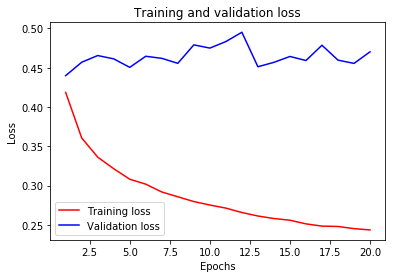

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

> The validation MAE stays in the 0.40s: you can't even beat the common-sense baseline using the small convnet.

This is because the convnets looks for patterns anywhere in the input timeseries and has no knowledge of the temporal position of a pattern it sees. The convnet fails at producing meaningful resultss because more recent data points should be interpreted differently from older data points in the case of this specific forecasting problem.

One strategy to combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use 1D convnet as a preprocessing step before an RNN. This is especially beneficial when you're dealing with sequences that are too long to be processed with RNNs. The convnet will turn the long input sequence into much shorter sequences of higher-level features. This sequence will then become the input to the RNN part of the network.

<img src='image/fig630.png' width="300">

#### Preparing higher-resolution data generators for the Jena dataset

In [24]:
lookback = 720
step = 3
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

#### Model combining a 1D convolutional base and a GRU layer

In [25]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=RMSprop(),
              loss='mae',
              metrics=['acc'])
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              verbose=2)

Epoch 1/20
 - 65s - loss: 0.3408 - acc: 0.0000e+00 - val_loss: 0.2851 - val_acc: 0.0000e+00
Epoch 2/20
 - 69s - loss: 0.3050 - acc: 0.0000e+00 - val_loss: 0.2769 - val_acc: 0.0000e+00
Epoch 3/20
 - 72s - loss: 0.2935 - acc: 0.0000e+00 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 4/20
 - 71s - loss: 0.2867 - acc: 0.0000e+00 - val_loss: 0.2750 - val_acc: 0.0000e+00
Epoch 5/20
 - 85s - loss: 0.2805 - acc: 0.0000e+00 - val_loss: 0.2758 - val_acc: 0.0000e+00
Epoch 6/20
 - 75s - loss: 0.2745 - acc: 0.0000e+00 - val_loss: 0.2743 - val_acc: 0.0000e+00
Epoch 7/20
 - 78s - loss: 0.2699 - acc: 0.0000e+00 - val_loss: 0.2845 - val_acc: 0.0000e+00
Epoch 8/20
 - 68s - loss: 0.2637 - acc: 0.0000e+00 - val_loss: 0.2828 - val_acc: 0.0000e+00
Epoch 9/20
 - 77s - loss: 0.2591 - acc: 0.0000e+00 - val_loss: 0.2782 - val_acc: 0.0000e+00
Epoch 10/20
 - 68s - loss: 0.2557 - acc: 0.0000e+00 - val_loss: 0.2851 - val_acc: 0.0000e+00
Epoch 11/20
 - 79s - loss: 0.2508 - acc: 0.0000e+00 - val_loss: 0.2886 - val_ac

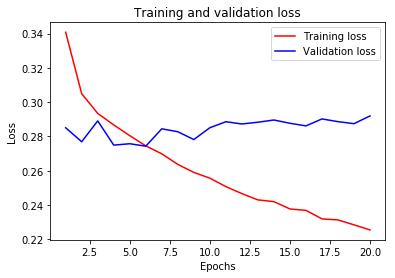

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

> Judging from the validation loss, this setup isn't as good as the regularized GRU alone, but it's significantly faster.